In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

First lets upload some data!

In [11]:
df=pd.read_csv(r'C:\Users\JoeDe\OneDrive\Desktop\PQ YG_AD Master Sheet.csv')
df.head()


,Count,SQ,CAGE,ID,Sex,Age,GT,TX,DOB,Inj Start,...,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,36.0,4,278,909068.0,0.0,0.0,0.0,1.0,11/1/17,2/12/18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37.0,4,278,916408.0,0.0,0.0,0.0,1.0,11/3/17,2/12/18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.0,4,278,364298.0,0.0,0.0,0.0,1.0,11/6/17,2/12/18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39.0,4,278,364510.0,0.0,0.0,0.0,1.0,11/7/17,2/12/18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40.0,4,275,83671.0,0.0,0.0,2.0,0.0,11/1/17,2/12/18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets check to see what data types we are working with!

In [15]:
df.dtypes

Count          float64
SQ              object
CAGE            object
ID             float64
Sex            float64
                ...   
Unnamed: 68    float64
Unnamed: 69    float64
Unnamed: 70    float64
Unnamed: 71    float64
Unnamed: 72    float64
Length: 73, dtype: object

df.columns can show us what columns we are working with! For this example we will be looking at the data in the TTC1 column.

In [103]:
df.columns

Index(['Count', 'SQ', 'CAGE', 'ID', 'Sex', 'Age', 'GT', 'TX', 'DOB',
       'Inj Start', 'InjAGE', 'Open', 'Close', 'TDist', 'TVacount', 'Tmargin',
       'Tcenter', '2H', 'Fall', 'LF1', 'LF2', 'LF3', 'LF4', 'LFAVG', 'S1',
       'S2', 'S3', 'S4', 'S5', 'S6', 'TR AVG', 'MaxP AVG', 'TTC1', 'TTC2',
       'CCT1', 'CCT2', 'CT5(2)', 'Recall2', 'CT2', 'TPTA2', 'S1 %F', 'S2 %F',
       'S3 %F', 'S4 %F', 'Wwire/Bridge', 'WTR', 'WMAX'],
      dtype='object')

There are several rows that do not contain data. lets drop them!

In [101]:

df=df.dropna(axis=0, how='all')
df

,Count,SQ,CAGE,ID,Sex,Age,GT,TX,DOB,Inj Start,...,Recall2,CT2,TPTA2,S1 %F,S2 %F,S3 %F,S4 %F,Wwire/Bridge,WTR,WMAX
0,36.0,4,278,909068.0,0.0,0.0,0.0,1.0,11/1/17,2/12/18,...,1.0,6.0,2.0,57.1,64.6,1.9,92.4,30.6,30.0,29.9
1,37.0,4,278,916408.0,0.0,0.0,0.0,1.0,11/3/17,2/12/18,...,1.0,7.0,3.0,35.0,59.9,9.0,93.7,27.2,26.6,26.4
2,38.0,4,278,364298.0,0.0,0.0,0.0,1.0,11/6/17,2/12/18,...,1.0,9.0,4.0,25.5,73.5,16.2,91.6,28.7,27.8,27.3
3,39.0,4,278,364510.0,0.0,0.0,0.0,1.0,11/7/17,2/12/18,...,1.0,8.0,4.0,24.5,56.2,3.3,67.6,24.1,23.4,22.9
4,40.0,4,275,83671.0,0.0,0.0,2.0,0.0,11/1/17,2/12/18,...,1.0,9.0,5.0,11.0,42.5,4.4,86.7,22.9,22.4,22.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,212.0,19,329,364351.0,1.0,1.0,2.0,1.0,12/21/18,10/8/19,...,1.0,15.0,10.0,13.7,7.0,5.7,16.1,18.3,17.9,NaN
153,213.0,19,328B,364255.0,0.0,1.0,0.0,0.0,12/20/18,10/8/19,...,1.0,6.0,2.0,25.4,70.7,23.7,89.2,28.8,28.1,NaN
154,215.0,19,321,364376.0,0.0,1.0,0.0,1.0,9/30/18,10/8/19,...,1.0,7.0,3.0,2.9,10.7,2.6,46.6,27.7,27.3,NaN
155,216.0,19,326,913694.0,1.0,1.0,2.0,0.0,11/21/18,10/8/19,...,1.0,9.0,5.0,16.3,53.9,17.9,96.8,24.4,23.7,NaN


For this example we will only be looking at the age group 0, so we will need to filter our data. Next we will use the groupby() function to group our TTC1 data by sex, gt and tx and go ahead and get the mean from each group.

In [80]:
df[df['Age']==0]
df_clean= df.groupby(['Sex', 'GT', 'TX'])['TTC1'].mean()
df_clean

Sex  GT   TX 
0.0  0.0  0.0    13.650000
          1.0    13.263158
     2.0  0.0    17.550000
          1.0    14.950000
1.0  0.0  0.0    17.095238
          1.0    15.700000
     2.0  0.0    17.666667
          1.0    15.894737
Name: TTC1, dtype: float64

Next we will run a three-way ANOVA!

In [81]:
model = ols('TTC1 ~ C(Sex) + C(GT) + C(TX) + C(Sex):C(GT) + C(Sex):C(TX) + C(GT):C(TX) + C(Sex):C(GT):C(TX)', data=df).fit()
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,3726.450000,1.0,180.159988,1.989289e-27
C(Sex),121.591696,1.0,5.878506,1.652386e-02
C(GT),152.100000,1.0,7.353469,7.480439e-03
C(TX),1.458097,1.0,0.070494,7.909865e-01
C(Sex):C(GT),54.531362,1.0,2.636388,1.065544e-01
C(Sex):C(TX),5.077949,1.0,0.245500,6.209917e-01
C(GT):C(TX),24.172283,1.0,1.168640,2.814275e-01
C(Sex):C(GT):C(TX),8.257336,1.0,0.399211,5.284650e-01
Residual,3081.933208,149.0,NaN,NaN


Finally lets graph what we have and separate the graphs by sex.

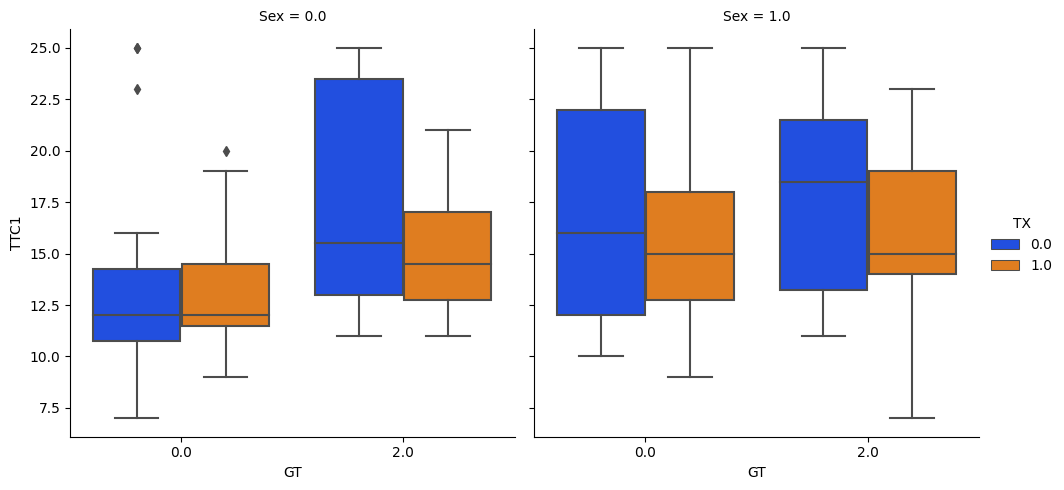

In [100]:
sns.set_palette('bright')
fig=sns.catplot(data=df, x='GT', y='TTC1', hue='TX', col='Sex', kind='box')




Some resources to check out!

https://ethanweed.github.io/pythonbook/05.05-anova2.html
https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/
https://www.youtube.com/watch?v=EWYzeZbchR0&t=264s